<h1> Network Maps: <br/> Mapping the Money </h1>

In this notebook I will attempt to create a graph that vizualizes the connection between CEO's,and their respected busniess or businesses, and country of origin. The methods used here can be extended to include any network information and their sources to generate either an undirected r directed multigraph.<br/>
<img src="datas/dirgraphex.png" />

                   

-------------------------------------------------------------------------------
<h2>Getting the data</h2>

Here we will use pandas to extract data from webpage tables. I chose the [The World's Billionaires](https://en.wikipedia.org/wiki/The_World%27s_Billionaires) from wikipedia.


In [11]:
# Load pandas
import pandas as pd

# Webpage url                                                                                                               
url = 'https://en.wikipedia.org/wiki/The_World%27s_Billionaires'

# Extract all tables
dfs = pd.read_html(url)

# Get the tables by their index ordered on the page
# Here I chose the 2017-2021 tables but this can be extended.
df2021 = dfs[2]
df2020 = dfs[3]
df2019 = dfs[4]
df2018 = dfs[5]
df2017 = dfs[6]
df = pd.concat([df2021, df2020, df2019,df2018,df2017])
df.head(5)
#df.to_csv('bizdata.csv') #Save as a csv file

,No.,Name,Net worth (USD),Age,Nationality,Source(s) of wealth
0,1,Jeff Bezos,$177 billion,57,United States,Amazon
1,2,Elon Musk,$151 billion,49,United States,"Tesla, SpaceX"
2,3,Bernard Arnault & family,$150 billion,72,France,LVMH
3,4,Bill Gates,$124 billion,65,United States,Microsoft
4,5,Mark Zuckerberg,$97 billion,36,United States,Meta Platforms


<h2>Building the Data Frame</h2>

After getting our data, I saved the data as a .csv file then used Pandas to read that file and create a Data Frame.

In [12]:
data = pd.read_csv('datas/bizdata.csv')
df = pd.DataFrame(data,columns=['Name','Biz','Nat','Net'])
df.tail(10)

,Name,Biz,Nat,Net
40,Bill Gates,Microsoft,United States,$86.0 billion
41,Warren Buffett,Berkshire Hathaway,United States,$75.6 billion
42,Jeff Bezos,Amazon,United States,$72.8 billion
43,Amancio Ortega,"Inditex, Zara",Spain,$71.3 billion
44,Mark Zuckerberg,"Facebook, Inc.",United States,$56.0 billion
45,Carlos Slim,"América Móvil, Grupo Carso",Mexico,$54.5 billion
46,Larry Ellison,Oracle Corporation,United States,$52.2 billion
47,Charles Koch,Koch Industries,United States,$48.3 billion
48,David Koch,Koch Industries,United States,$48.3 billion
49,Michael Bloomberg,Bloomberg L.P.,United States,$47.5 billion


<h2>Building a Graph from the DataFrame</h2>

Initialize a graph using Networkx 

In [13]:
#Import packages
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

Here Im going to build our graphs edges and nodes.

In [14]:
#Getting unqiue Nationality and Business
dfNatu = df.Nat.unique()
dfBizu = df.Biz.unique()

# Lists of Names, Unique Countries and Unique Biz
dfNaml = df.Name.tolist()
natl = dfNatu.tolist()
bizl = dfBizu.tolist()
naml = dfNaml

#Adding Nodes
G.add_nodes_from(natl)
G.add_nodes_from(bizl)
G.add_nodes_from(naml)

#Creates edge tuples to nx can make connections
Nat_Biz_edges = list(zip(df.Nat, df.Biz))
Biz_Name_edges = list(zip(df.Biz, df.Name))

#Add edges to graph
G.add_edges_from(Nat_Biz_edges)
G.add_edges_from(Biz_Name_edges)


Some manipulation with node size according to a dictionary of keys and values.

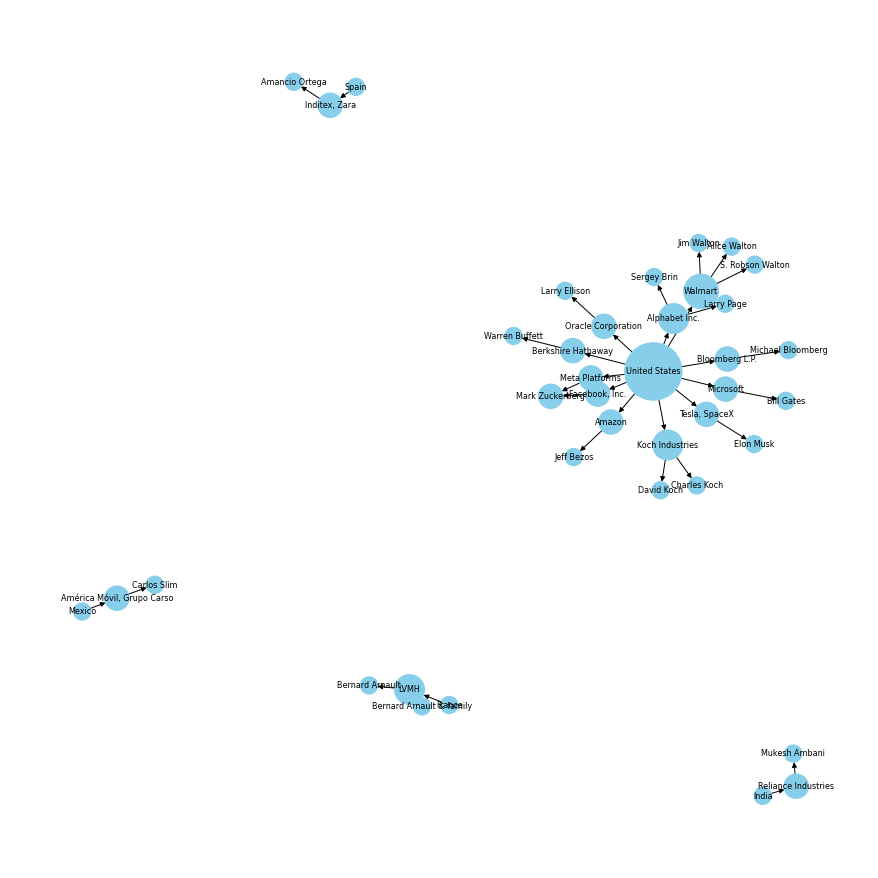

In [16]:
#Node maniuplation
degrees = dict(nx.degree(G))
xkeys = list(degrees.keys())
yvalues = list(degrees.values())
multiplied_list = [element * 300 for element in yvalues]  #Node sizes scaled up by 300
plt.figure(1,figsize=(12,12)) 
nx.draw(G,arrows=True,nodelist=xkeys,node_size=multiplied_list,with_labels=True,node_color='skyblue', font_size=8)
plt.show()